<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Data Refinery 


In [8]:
print(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

In [20]:
print(boston_df.columns)

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


In [21]:
boston_df.drop("Unnamed: 0", axis=1, inplace=True)

In [22]:
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [23]:
boston_df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


In [27]:
type(boston_df)

pandas.core.frame.DataFrame

In [28]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [42]:
boston_df['CHAS'] = boston_df['CHAS'].astype('category')

In [43]:
boston_df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD         float64
TAX         float64
PTRATIO     float64
LSTAT       float64
MEDV        float64
dtype: object

In [31]:
search = pd.DataFrame.duplicated(boston_df)
print(boston_df)
print(search[search==True])

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   

In [34]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [35]:
boston_df.isnull().values.any()

False

In [36]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Data Visualisation 

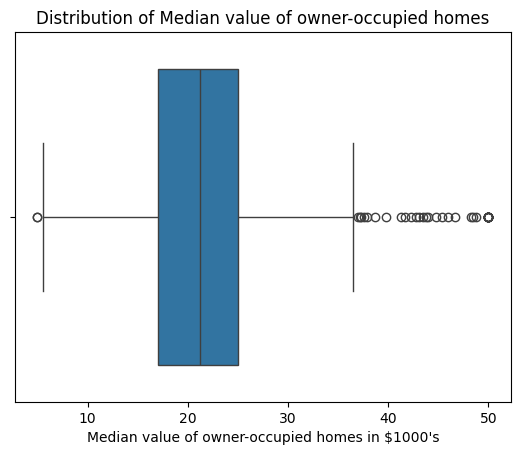

In [38]:
Medv_graph = sns.boxplot(x='MEDV',data = boston_df)
pyplot.title("Distribution of Median value of owner-occupied homes")
pyplot.xlabel("Median value of owner-occupied homes in $1000's")
pyplot.show()

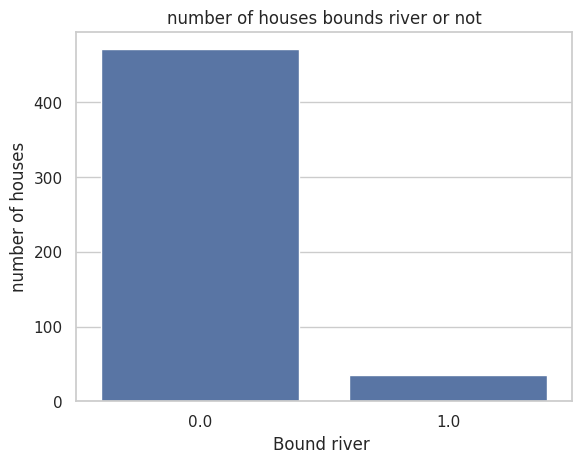

In [49]:
sns.set(style = 'whitegrid')
chas_graph = sns.countplot(x= 'CHAS', data=boston_df)
pyplot.title('number of houses bounds river or not')
pyplot.xlabel('Bound river ')
pyplot.ylabel('number of houses')
pyplot.show()

In [50]:
boston_df.loc[(boston_df['AGE']<=35),'age group']='35 year and younger'
boston_df.loc[((boston_df['AGE']>35)&(boston_df['AGE']<=70)),'age group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>70),'age group'] = '70 and older'

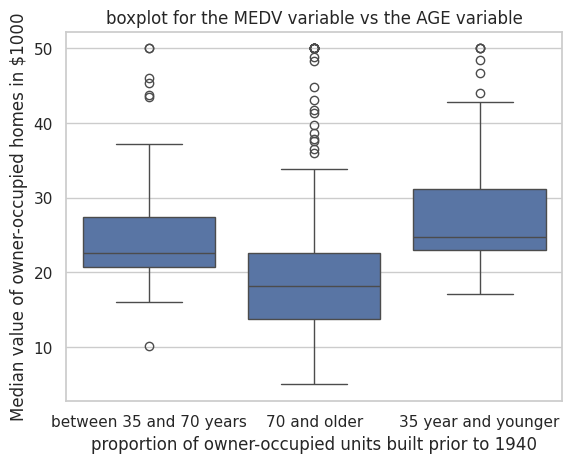

In [53]:
medv_vs_age = sns.boxplot(x = 'age group',y = 'MEDV',data = boston_df)
pyplot.title('boxplot for the MEDV variable vs the AGE variable')
pyplot.xlabel('proportion of owner-occupied units built prior to 1940')
pyplot.ylabel('Median value of owner-occupied homes in $1000')
pyplot.show()

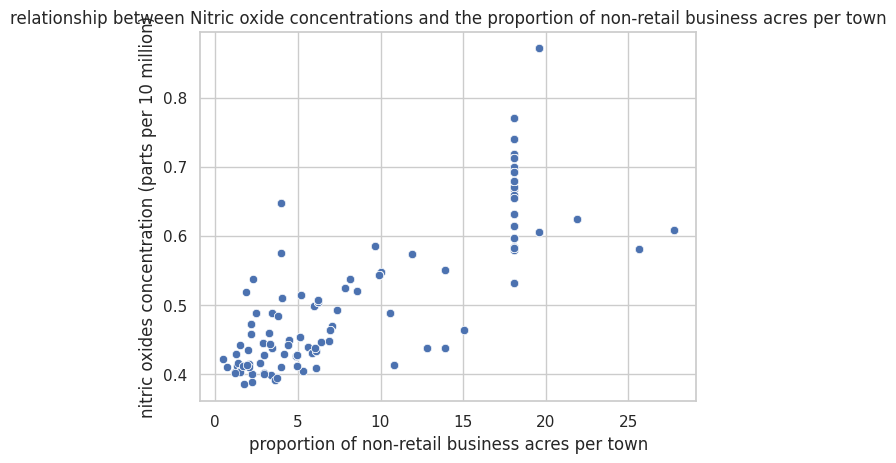

In [55]:
rlt_nox_ind = sns.scatterplot(x = 'INDUS', y ='NOX', data=boston_df)
pyplot.title('relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.xlabel('proportion of non-retail business acres per town')
pyplot.ylabel('nitric oxides concentration (parts per 10 million)')
pyplot.show()

**conclusion** : as long  the  proportion of non-retail business acres per town increases we  observe that also that nitric oxides concentration rises 

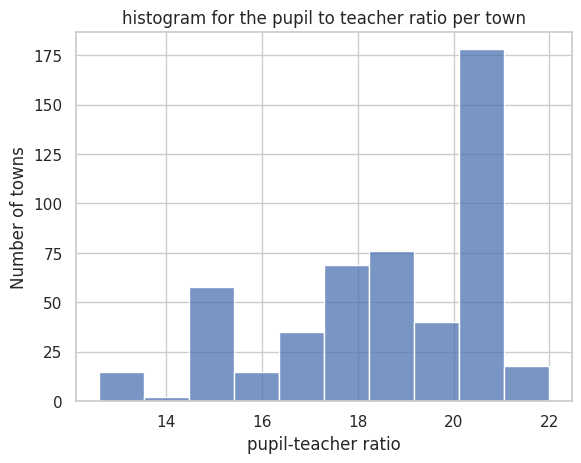

In [57]:
hist_pitratio = sns.histplot(boston_df['PTRATIO'],bins = 10,kde = False)
pyplot.title('histogram for the pupil to teacher ratio per town')
pyplot.xlabel('pupil-teacher ratio')
pyplot.ylabel('Number of towns')
pyplot.show()

## Tests 

**Is there a significant difference in median value of houses bounded by the Charles river or not?**

***hypothesis***

H0 : There is no significant difference in the median value of houses between those bounded by the Charles River and those that are not. 

H1 : There is a significant difference in the median value of houses between the two groups.

α = 0.05




In [60]:
from scipy.stats import ttest_ind
group0 = boston_df[boston_df['CHAS']==1]['MEDV']
group1 = boston_df[boston_df['CHAS']==0]['MEDV']
t_stat,pvalue = ttest_ind(group0,group1)
print("t_test statistics : " , t_stat)
print("p_value : " ,pvalue)

t_test statistics :  3.996437466090509
p_value :  7.390623170519905e-05


we notice that p_value is less than 0.05 , so we can reject the null hypothesis so there is a significant difference in the median value of houses between the two groups

***hypothesis***

H0 : There is no significant difference in the median value of houses between those which are younger than 35 , and those which are between 35 and 70 , and which are older than 70 years

H1 : There is a significant difference in the median value of houses between the 3 groups.

α = 0.05

In [62]:
from scipy.stats import f_oneway 
group0 = boston_df[(boston_df['AGE']<=35)]['MEDV']
group1 = boston_df[((boston_df['AGE']>35)&(boston_df['AGE']<=70))]['MEDV']
group2 = boston_df[(boston_df['AGE']>70)]['MEDV']
f_stats,p_value = f_oneway(group0,group1,group2)
print('f statistics : ',f_stats)
print('p value : ' , p_value)

f statistics :  36.40764999196599
p value :  1.7105011022702984e-15


we notice that p value is less than 0.05 , so we success to reject the null hypothesis , therfore there is a significant difference in the median value of houses between the 3 groups 

***hypothesis***

H0 : There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

H1 : There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

α = 0.05

In [64]:
from scipy.stats import pearsonr 
x = boston_df['INDUS']
y = boston_df['NOX']
corr_coef,p_value = pearsonr(x,y)
print('Pearson correlation coefficient : ',corr_coef)
print('P value : ',p_value)

Pearson correlation coefficient :  0.7636514469209192
P value :  7.913361061210442e-98


we see that p value is less than 0.05 , than we success to reject the null hypothesis , therfore there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town , also the Pearson correlation coefficient shows that there is kind of a strong relationship between the two variables

**Regression Analysis**

In [65]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 26 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        22:11:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we see that p value is actually less than 0.05 , therefor there is an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes 